<a href="https://colab.research.google.com/github/Wanita-8943/Main_Project/blob/main/A7_Predict_Unfreeze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##เรียกใช้ CSV

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 1085, done.
remote: Counting objects: 100% (248/248), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 1085 (delta 124), reused 241 (delta 121), pack-reused 837
Receiving objects: 100% (1085/1085), 14.09 MiB | 14.97 MiB/s, done.
Resolving deltas: 100% (621/621), done.
/content/efficientnet_keras_transfer_learning


In [4]:
import sys
sys.path.append('/content/drive/MyDrive/cut_panoramic/Model/Regression/All/7Re_All_1G_1e-4_16_0.2_250_New_Unfreez.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [5]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/cut_panoramic/Model/Regression/All/7Re_All_1G_1e-4_16_0.2_250_New_Unfreez.h5')
height = width = model.input_shape[1]

In [6]:
df = pd.read_csv (f'/content/drive/MyDrive/cut_panoramic/Data/All_Re.csv')
df

,Fig_Age,Fig_Person_Sex,Age(year),Class,Class_Re,Filename,Path_filename,Sex,Floder
0,1,1,7,Y07F,1,V1.jpg,/content/drive/My Drive/TVT_Gender/train/Femal...,Female,Both
1,2,1,7,Y07F,1,Flip_V1.jpg,/content/drive/My Drive/TVT_Gender/train/Femal...,Female,Both
2,3,2,7,Y07F,1,V2.jpg,/content/drive/My Drive/TVT_Gender/train/Femal...,Female,Both
3,4,2,7,Y07F,1,Flip_V2.jpg,/content/drive/My Drive/TVT_Gender/train/Femal...,Female,Both
4,5,3,7,Y07F,1,V3.jpg,/content/drive/My Drive/TVT_Gender/train/Femal...,Female,Both
...,...,...,...,...,...,...,...,...,...
4745,121,77,25,Y25M,19,Flip_J463.jpg,/content/drive/My Drive/TVT_Gender/test/Male/F...,Male,Both
4746,122,78,25,Y25M,19,J464.jpg,/content/drive/My Drive/TVT_Gender/test/Male/J...,Male,Both
4747,123,78,25,Y25M,19,Flip_J464.jpg,/content/drive/My Drive/TVT_Gender/test/Male/F...,Male,Both
4748,124,79,25,Y25M,19,J465.jpg,/content/drive/My Drive/TVT_Gender/test/Male/J...,Male,Both


In [7]:
train = df[df['Fig_Age'].between(1,75)]
test = df[df['Fig_Age'].between(101,125)]

In [8]:
DATA_PATH = "/content/drive/My Drive/TVT_Gender"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'train')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'test')
print(test_dir)

/content/drive/My Drive/TVT_Gender/train
/content/drive/My Drive/TVT_Gender/test


In [9]:
# base_dir = '/content/drive/MyDrive/TVT_Gender'
# os.makedirs(base_dir, exist_ok=True)

# # Directories for our training,
# # validation and test splits
# train_dir = os.path.join(base_dir, 'train')
# os.makedirs(train_dir, exist_ok=True)
# validation_dir = os.path.join(base_dir, 'validation')
# os.makedirs(validation_dir, exist_ok=True)
# test_dir = os.path.join(base_dir, 'test')
# # os.makedirs(test_dir, exist_ok=True)

In [10]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'Path_filename',
        y_col = 'Class_Re',
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need categorical labels
        #เนื่องจากเราใช้ categorical_crossentropy loss เราจึงต้องมีป้ายกำกับตามหมวดหมู่
        class_mode = 'other')

#label
# labels = (train_generator.class_indices)
# labels = dict((v,k) for k,v in labels.items())
# print(labels)

Found 2850 validated image filenames.


In [11]:
test = df[df['Fig_Age'].between(101,125)]
test

,Fig_Age,Fig_Person_Sex,Age(year),Class,Class_Re,Filename,Path_filename,Sex,Floder
100,101,51,7,Y07F,1,V67.jpg,/content/drive/My Drive/TVT_Gender/test/Female...,Female,Both
101,102,51,7,Y07F,1,Flip_V67.jpg,/content/drive/My Drive/TVT_Gender/test/Female...,Female,Both
102,103,52,7,Y07F,1,V68.jpg,/content/drive/My Drive/TVT_Gender/test/Female...,Female,Both
103,104,52,7,Y07F,1,Flip_V68.jpg,/content/drive/My Drive/TVT_Gender/test/Female...,Female,Both
104,105,53,7,Y07F,1,V69.jpg,/content/drive/My Drive/TVT_Gender/test/Female...,Female,Both
...,...,...,...,...,...,...,...,...,...
4745,121,77,25,Y25M,19,Flip_J463.jpg,/content/drive/My Drive/TVT_Gender/test/Male/F...,Male,Both
4746,122,78,25,Y25M,19,J464.jpg,/content/drive/My Drive/TVT_Gender/test/Male/J...,Male,Both
4747,123,78,25,Y25M,19,Flip_J464.jpg,/content/drive/My Drive/TVT_Gender/test/Male/F...,Male,Both
4748,124,79,25,Y25M,19,J465.jpg,/content/drive/My Drive/TVT_Gender/test/Male/J...,Male,Both


In [12]:
act = test['Class_Re'].tolist() #ค่าจริง
path = test['Path_filename'].tolist() #path

In [13]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตามพารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)  #model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [14]:
predict_image(path[0])[0]

1/1 [==============================] - 9s 9s/step


1.1312246

In [15]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = predict[0]
    pred_list.append(result)
    # prob_list.append(predict[result])

1/1 [==============================] - 0s 25ms/step


In [16]:
pred_list

[1.1312246,
 1.112618,
 1.1111307,
 1.1111307,
 1.111134,
 1.1111388,
 1.1111326,
 1.1116834,
 1.1111331,
 1.1111331,
 1.1111307,
 1.1111307,
 1.1111307,
 1.1111364,
 1.1111321,
 1.1111374,
 1.1111307,
 1.1111307,
 1.111156,
 1.1113958,
 1.111897,
 1.1111307,
 1.1111326,
 1.1111317,
 1.1111307,
 2.362636,
 2.236752,
 1.8487659,
 2.0197377,
 1.2484169,
 1.2550569,
 1.9917083,
 1.8876338,
 2.0123034,
 2.2323265,
 1.547503,
 2.1085706,
 3.2174268,
 3.4274726,
 1.409739,
 1.733377,
 1.7962236,
 2.7209477,
 2.365982,
 2.2935705,
 3.169929,
 3.2802272,
 1.1119499,
 1.1116729,
 2.2910576,
 3.3533945,
 3.8132756,
 2.9619884,
 2.577798,
 3.7324297,
 3.4923878,
 2.1535091,
 2.5795674,
 3.9745753,
 3.7044296,
 2.5140882,
 2.391306,
 2.2598987,
 3.0959668,
 3.0900517,
 2.937509,
 3.0412984,
 2.9297714,
 2.715002,
 2.7050242,
 3.218933,
 3.0935931,
 2.589457,
 2.8470855,
 3.349564,
 3.6421022,
 4.6221704,
 4.3483467,
 4.1668625,
 3.884183,
 2.5494785,
 2.9732838,
 2.1199927,
 2.1517682,
 4.0826044,

In [17]:
print(type(pred_list))

<class 'list'>


In [18]:
pred_int = np.around(pred_list)

In [19]:
pred = np.array(pred_int) #แปลงเป็น array
act = np.array(act)

In [20]:
pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
        2.,  2.,  2.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,
        1.,  2.,  2.,  3.,  2.,  2.,  3.,  3.,  1.,  1.,  2.,  3.,  4.,
        3.,  3.,  4.,  3.,  2.,  3.,  4.,  4.,  3.,  2.,  2.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  5.,  4.,
        4.,  4.,  3.,  3.,  2.,  2.,  4.,  4.,  2.,  3.,  4.,  4.,  4.,
        4.,  2.,  2.,  4.,  4.,  2.,  2.,  4.,  3.,  4.,  4.,  4.,  4.,
        4.,  4.,  5.,  3.,  3.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  6.,  5.,  5.,  6.,  5.,  6.,  6.,  5.,
        6.,  6.,  5.,  6.,  5.,  5.,  5.,  6.,  6.,  6.,  5.,  5.,  5.,
        5.,  6.,  6.,  6.,  6.,  5.,  5.,  7.,  7.,  6.,  6.,  7.,  6.,
        5.,  5.,  8.,  8.,  5.,  6.,  7.,  6.,  6.,  7.,  6.,  6.,  7.,
        6.,  6.,  6.,  6.,  7.,  6.,  9.,  6.,  6.,  9.,  9.,  6

#confusion_matrix

In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 30.63157894736842%
              precision    recall  f1-score   support

           1       0.79      1.00      0.88        50
           2       0.62      0.56      0.59        50
           3       0.50      0.66      0.57        50
           4       0.50      0.48      0.49        50
           5       0.37      0.56      0.44        50
           6       0.29      0.52      0.37        50
           7       0.25      0.22      0.23        50
           8       0.15      0.08      0.11        50
           9       0.14      0.14      0.14        50
          10       0.21      0.12      0.15        50
          11       0.28      0.20      0.23        50
          12       0.22      0.24      0.23        50
          13       0.12      0.12      0.12        50
          14       0.14      0.22      0.17        50
          15       0.16      0.30      0.21        50
          16       0.23      0.22      0.22        50
          17       0.16      0.18      0

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 76.24999999999999, 'Predicted label')

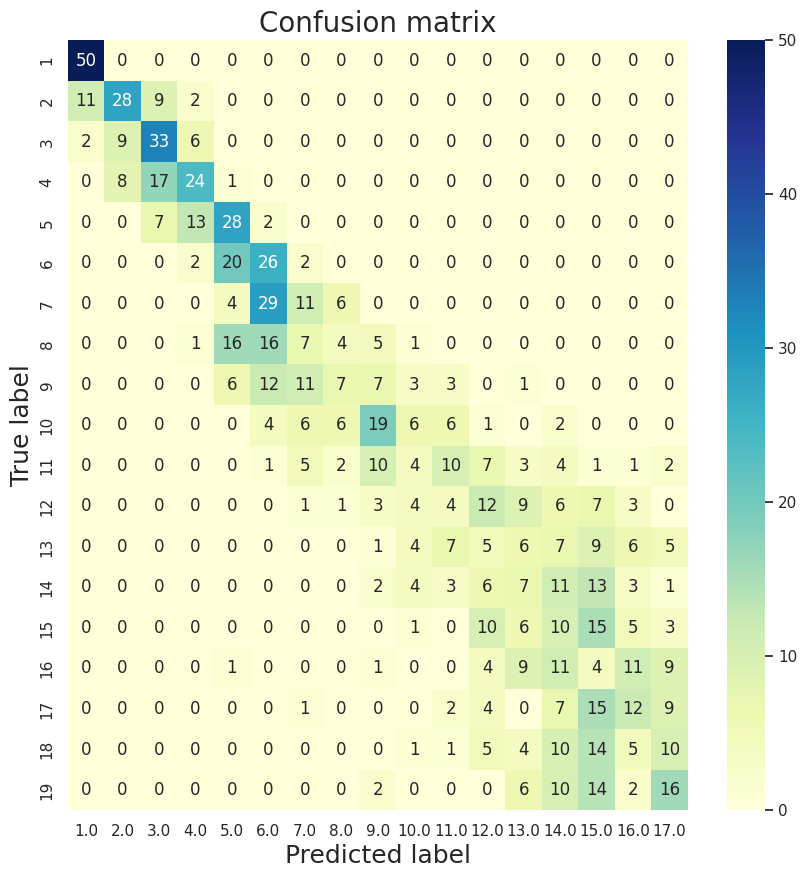

In [22]:
#create CF 
data = {'Actual': act,'Predicted' : pred}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [23]:
# from sklearn import metrics

# MAE, MSE and RMSE

In [26]:

from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(act,pred)
mse = mean_squared_error(act,pred)
rmse = mean_squared_error(act,pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.5273684210526315
MSE: 4.8578947368421055
RMSE: 2.2040632334037302
